In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

In [ ]:
# H0 : no significant relationship between house price and size; B1 = 0
# H1: there is a significant relationship between house price and size; B1 not = 0

In [2]:
sacramento = pd.read_csv("dataset/sacramento.csv")
sacramento

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,1005 MORENO WAY,SACRAMENTO,95838,CA,3,2,1410,Residential,Fri May 16 00:00:00 EDT 2008,180000,38.646206,-121.442767
1,10105 MONTE VALLO CT,SACRAMENTO,95827,CA,4,2,1578,Residential,Fri May 16 00:00:00 EDT 2008,190000,38.573917,-121.316916
2,10133 NEBBIOLO CT,ELK GROVE,95624,CA,4,3,2096,Residential,Fri May 16 00:00:00 EDT 2008,289000,38.391085,-121.347231
3,10165 LOFTON WAY,ELK GROVE,95757,CA,3,2,1540,Residential,Fri May 16 00:00:00 EDT 2008,266510,38.387708,-121.436522
4,10254 JULIANA WAY,SACRAMENTO,95827,CA,4,2,2484,Residential,Fri May 16 00:00:00 EDT 2008,331200,38.568030,-121.309966
...,...,...,...,...,...,...,...,...,...,...,...,...
808,9507 SEA CLIFF WAY,ELK GROVE,95758,CA,4,2,2056,Residential,Wed May 21 00:00:00 EDT 2008,285000,38.410992,-121.479043
809,9570 HARVEST ROSE WAY,SACRAMENTO,95827,CA,5,3,2367,Residential,Wed May 21 00:00:00 EDT 2008,315537,38.555993,-121.340352
810,9723 TERRAPIN CT,ELK GROVE,95757,CA,4,3,2354,Residential,Wed May 21 00:00:00 EDT 2008,335750,38.403492,-121.430224
811,9837 CORTE DORADO CT,ELK GROVE,95624,CA,4,2,1616,Residential,Wed May 21 00:00:00 EDT 2008,227887,38.400676,-121.381010


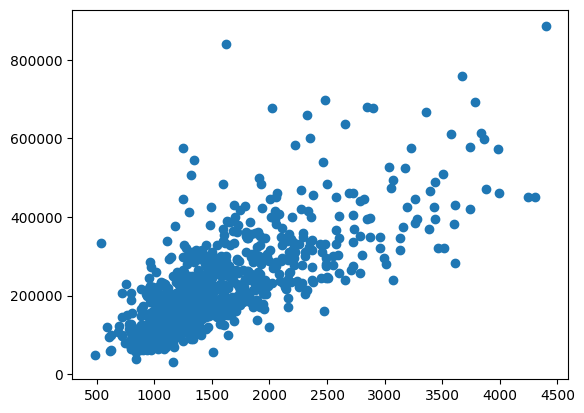

In [3]:
# Plot the relationship between x and y
plt.scatter(sacramento["sq__ft"], sacramento["price"], label='House size vs House price')

In [4]:
#model(y ~ x, data).fit()
model = smf.ols("price ~ sq__ft", data = sacramento).fit()

In [5]:
#view our summary of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.531
Model:                            OLS   Adj. R-squared:                  0.530
Method:                 Least Squares   F-statistic:                     917.9
Date:                Thu, 04 Dec 2025   Prob (F-statistic):          1.88e-135
Time:                        15:59:56   Log-Likelihood:                -10351.
No. Observations:                 813   AIC:                         2.071e+04
Df Residuals:                     811   BIC:                         2.072e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    1.62e+04   7611.940      2.128      0.0

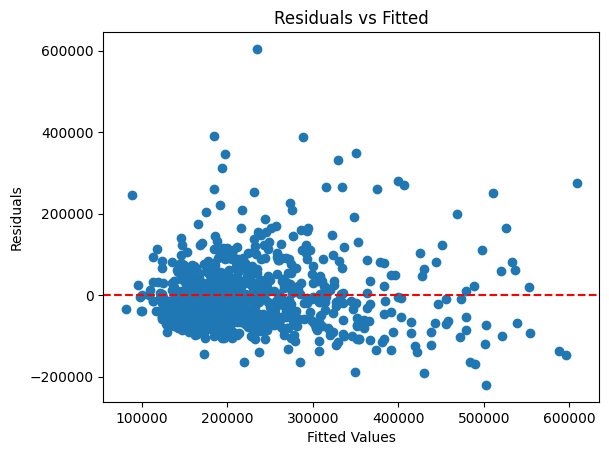

In [6]:
# Residual plots
fitted = model.fittedvalues
residuals = model.resid


# Homoscedasticity: Residuals vs. Fitted
plt.scatter(fitted, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted')
plt.show()


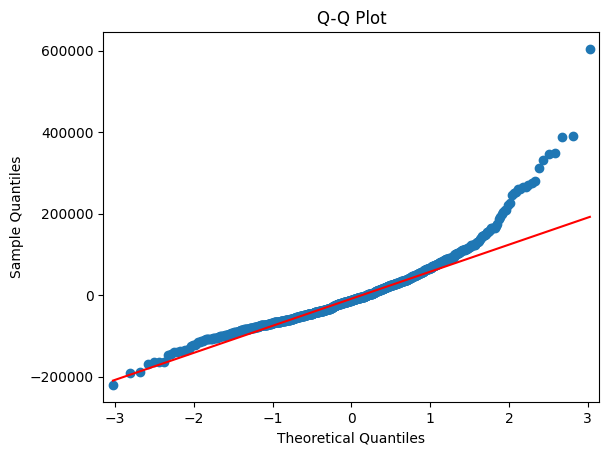

In [7]:
#normality of errors
sm.qqplot(residuals, line = 'q')
plt.title('Q-Q Plot')
plt.show()


In [8]:
# model(y ~ x + z, data)
multi_model = smf.ols("price ~ sq__ft + beds", data = sacramento).fit()

In [9]:
print(multi_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     482.9
Date:                Thu, 04 Dec 2025   Prob (F-statistic):          8.39e-139
Time:                        16:07:31   Log-Likelihood:                -10340.
No. Observations:                 813   AIC:                         2.069e+04
Df Residuals:                     810   BIC:                         2.070e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.624e+04   1.12e+04      5.010      0.0

In [11]:
sacramento['type'].unique()

array(['Residential', 'Multi-Family', 'Condo'], dtype=object)

In [ ]:
#one hot encoding
sacramento_encoded = pd.get_dummies(sacramento, columns = ['type'], drop_first = True)

In [13]:
sacramento_encoded

,street,city,zip,state,beds,baths,sq__ft,sale_date,price,latitude,longitude,type_Multi-Family,type_Residential
0,1005 MORENO WAY,SACRAMENTO,95838,CA,3,2,1410,Fri May 16 00:00:00 EDT 2008,180000,38.646206,-121.442767,False,True
1,10105 MONTE VALLO CT,SACRAMENTO,95827,CA,4,2,1578,Fri May 16 00:00:00 EDT 2008,190000,38.573917,-121.316916,False,True
2,10133 NEBBIOLO CT,ELK GROVE,95624,CA,4,3,2096,Fri May 16 00:00:00 EDT 2008,289000,38.391085,-121.347231,False,True
3,10165 LOFTON WAY,ELK GROVE,95757,CA,3,2,1540,Fri May 16 00:00:00 EDT 2008,266510,38.387708,-121.436522,False,True
4,10254 JULIANA WAY,SACRAMENTO,95827,CA,4,2,2484,Fri May 16 00:00:00 EDT 2008,331200,38.568030,-121.309966,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
808,9507 SEA CLIFF WAY,ELK GROVE,95758,CA,4,2,2056,Wed May 21 00:00:00 EDT 2008,285000,38.410992,-121.479043,False,True
809,9570 HARVEST ROSE WAY,SACRAMENTO,95827,CA,5,3,2367,Wed May 21 00:00:00 EDT 2008,315537,38.555993,-121.340352,False,True
810,9723 TERRAPIN CT,ELK GROVE,95757,CA,4,3,2354,Wed May 21 00:00:00 EDT 2008,335750,38.403492,-121.430224,False,True
811,9837 CORTE DORADO CT,ELK GROVE,95624,CA,4,2,1616,Wed May 21 00:00:00 EDT 2008,227887,38.400676,-121.381010,False,True


In [15]:
#replace hyphens with underscore
sacramento_encoded.columns = sacramento_encoded.columns.str.replace('-','_')

multi_cat_model = smf.ols("price ~ sq__ft + beds + type_Multi_Family + type_Residential", data = sacramento_encoded).fit()

In [16]:
print(multi_cat_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     247.6
Date:                Thu, 04 Dec 2025   Prob (F-statistic):          8.92e-139
Time:                        16:16:33   Log-Likelihood:                -10334.
No. Observations:                 813   AIC:                         2.068e+04
Df Residuals:                     808   BIC:                         2.070e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             